### Support Vector Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y = boston_data.target
x= df[['LSTAT']].values

In [4]:
svr = SVR(gamma='auto')
svr.fit(x,y)

SVR(gamma='auto')

In [5]:
sort_idx = x.flatten().argsort()

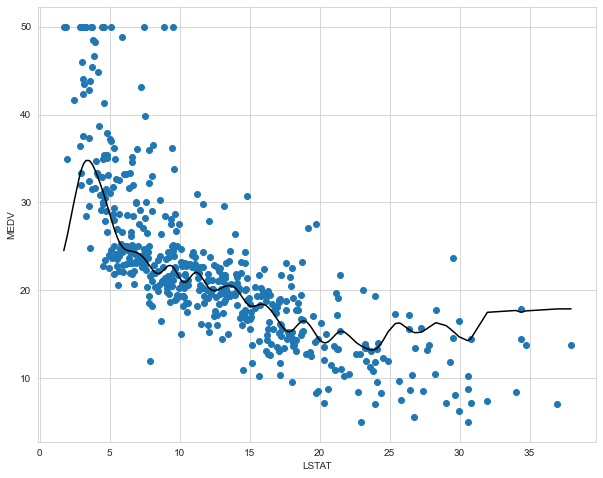

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(x[sort_idx], y[sort_idx])
plt.plot(x[sort_idx], svr.predict(x[sort_idx]),color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   train_size=0.8,
                                                   random_state=0)

### Linear Kernel

In [8]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [9]:
y_train_pred = svr.predict(x_train)

In [10]:
y_test_pred = svr.predict(x_test)

In [11]:
print("MSE train:{0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train:39.7023, test: 47.0531


In [12]:
print("R^2:{0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R^2:0.5337, test: 0.4222


### Polynomial

In [13]:
svr = SVR(kernel='poly',C=1e3, degree=2, gamma='auto')
svr.fit(x_train, y_train)

SVR(C=1000.0, degree=2, gamma='auto', kernel='poly')

In [14]:
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

In [15]:
print("MSE train:{0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train:61.1188, test: 71.1109


In [16]:
print("R^2:{0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R^2:0.2822, test: 0.1267


### rbf Kernel

In [17]:
svr = SVR(kernel='rbf',C=1e3,gamma=0.1)
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [18]:
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

In [19]:
print("MSE train:{0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train:25.0141, test: 33.9219


In [20]:
print("R^2:{0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R^2:0.7062, test: 0.5834


### Advantage and Disadvantages

**Advantages**
* Effective in high dimensional spaces
- Uses only a subset of training points(SV) in the decision function
- Many different Kernel functions can be specified for the decision function
    - linear
    - Polynomial
    - RBF
    - Sigmoid
    - Custom
  
**Disadvantages**
- Beware of overfitting when num_feature > num_smaples
- Choice of kernel and regularization can have a large impact on performance
- No probability estimates
    